## Financial Analysis Project 1 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

In [ ]:
import pandas_datareader.data as webimport 
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [32]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [38]:
# Bank of America
BAC = data.DataReader('BAC','stooq',start,end)
# use stooq instead of 'google' as a data source, b/c it has been 
# discontinued.

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [40]:
# List of ticker symbols (as strings) in alphabetical order:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [42]:
# want to concatenate the bank df together to single data frame, 
# (i.e., along the columns b/c all share same date and time index)

bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [44]:
# results in a multilevel index on the columns
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [45]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

## Exploratory Data Analysis

**Max Close price for each bank's stock**

In [46]:
# reminder on indexing
bank_stocks['BAC']['Close'].max()

46.2013

In [47]:
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())

BAC 46.2013
C 466.812
GS 203.691
JPM 57.1634
MS 58.5624
WFC 47.0925


In [49]:
# other method using xs, where 'Close' is the cross section
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

In [50]:
# new df called returns (p_t/p_t-1)-1
returns = pd.DataFrame()

In [51]:
for tick in tickers:
    returns[tick+'Return']= bank_stocks[tick]['Close'].pct_change()

In [52]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


/Users/ethanbensadoun/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


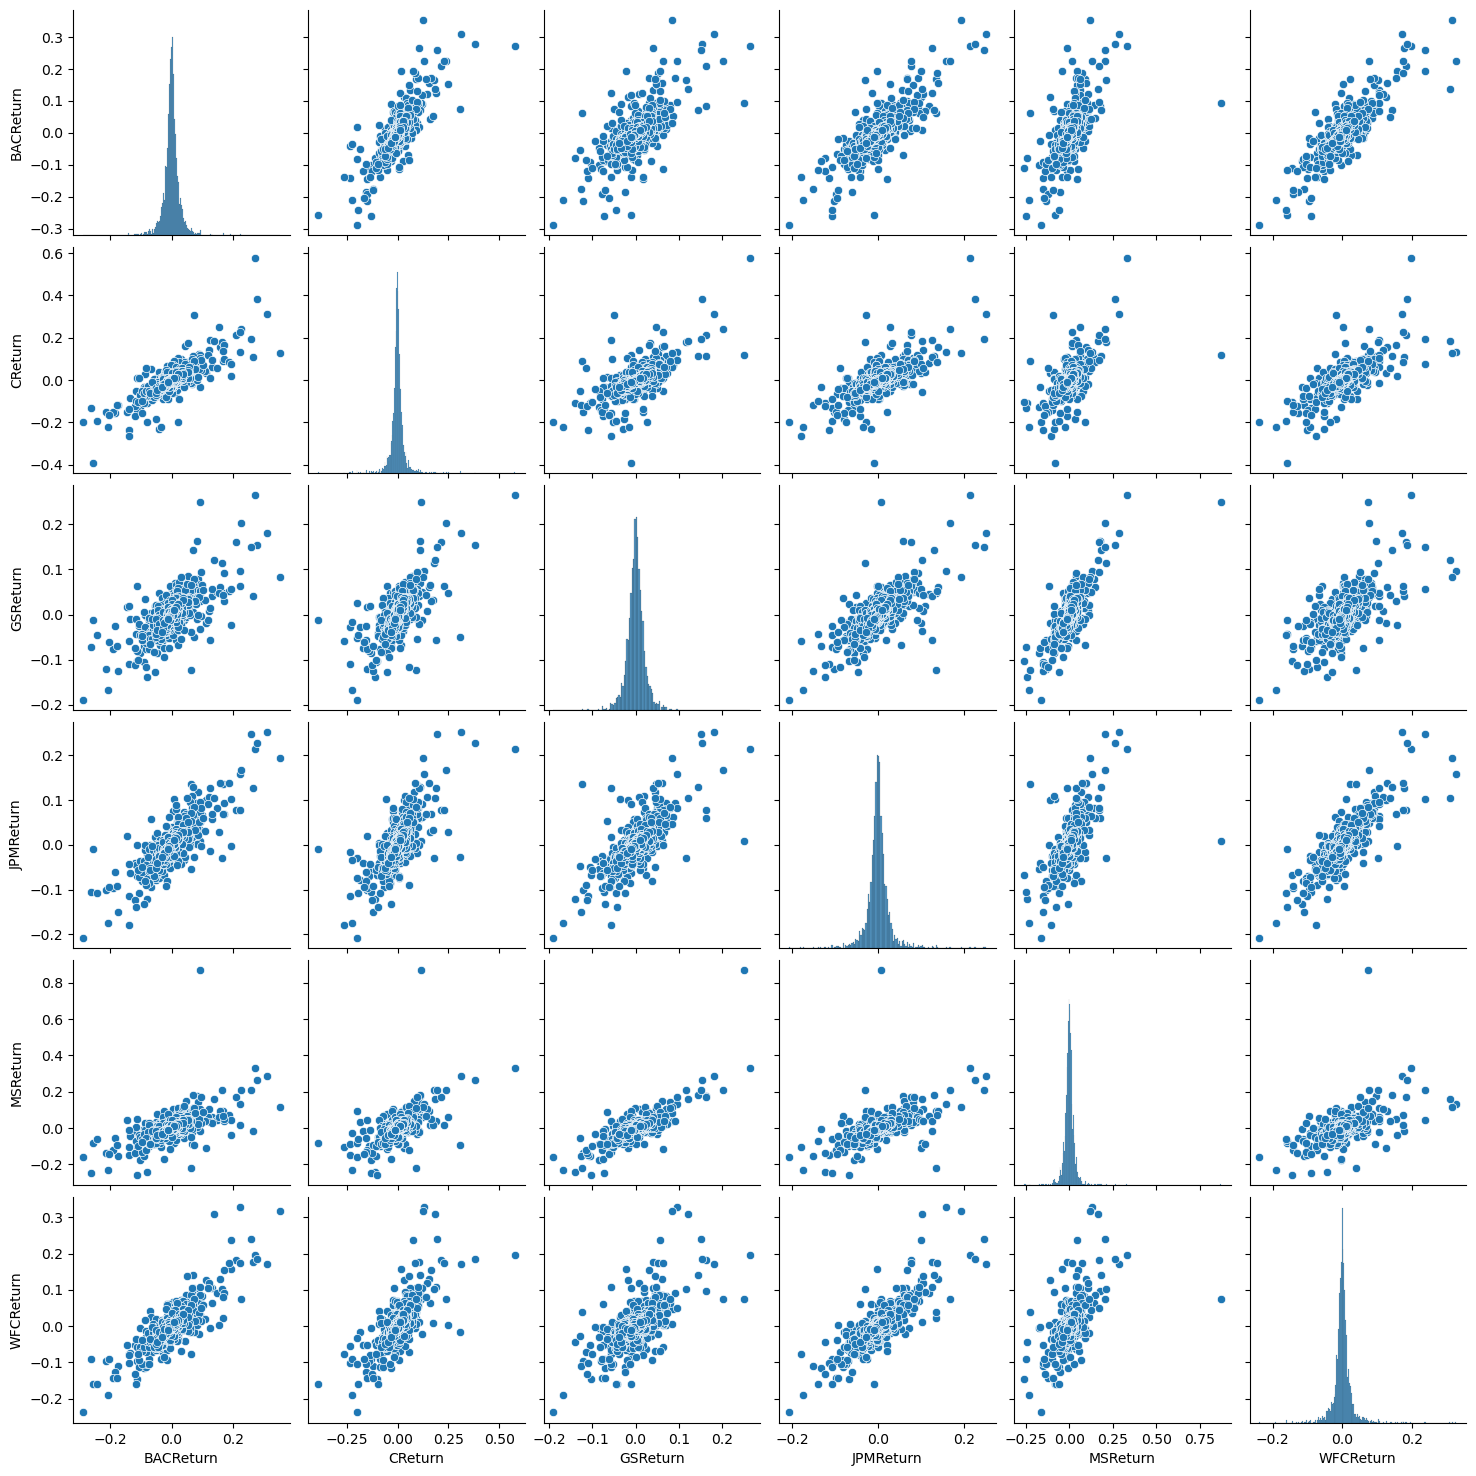

In [58]:
sns.pairplot(returns[1:])
# citigroup stock value major crash in 2008

In [62]:
# Figure out on what dates each bank stock had best and worst returns
returns.idxmin()
# returns the dates (indexes) of the min values for the returns

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [63]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [64]:
# high std deviation of the returns means stock is going up and down
# a lot, vs small which means price is steady

In [65]:
returns.std()

BACReturn    0.036605
CReturn      0.038615
GSReturn     0.025371
JPMReturn    0.027670
MSReturn     0.037708
WFCReturn    0.030221
dtype: float64

In [67]:
returns.loc['2015-01-01':'2015-12-31'].std()
# highest risk is Bank of America and Morgan Stanley

BACReturn    0.016149
CReturn      0.015280
GSReturn     0.014028
JPMReturn    0.013964
MSReturn     0.016006
WFCReturn    0.012545
dtype: float64

/var/folders/tp/gkzyxx613_bc3jkzd0lssqv80000gn/T/ipykernel_50805/679570042.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn']


<Axes: xlabel='MSReturn', ylabel='Density'>

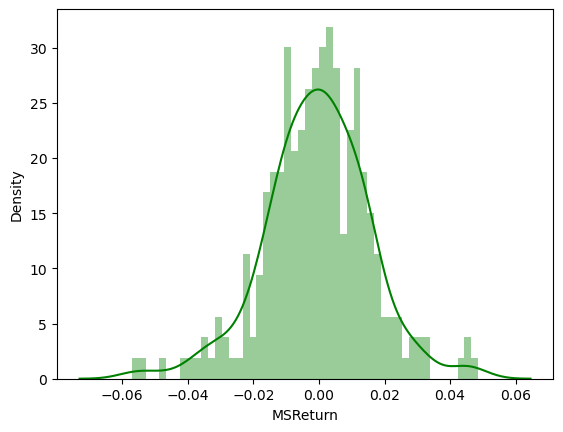

In [70]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn']
             ,color='green',bins=50)

/var/folders/tp/gkzyxx613_bc3jkzd0lssqv80000gn/T/ipykernel_50805/238257442.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],


<Axes: xlabel='CReturn', ylabel='Density'>

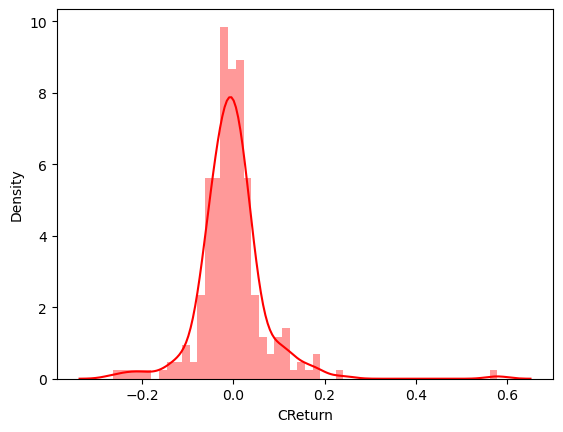

In [71]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],
             color='red',bins=50)
# Can notice that the std deviation is more stretch out here

## More Visualizations

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

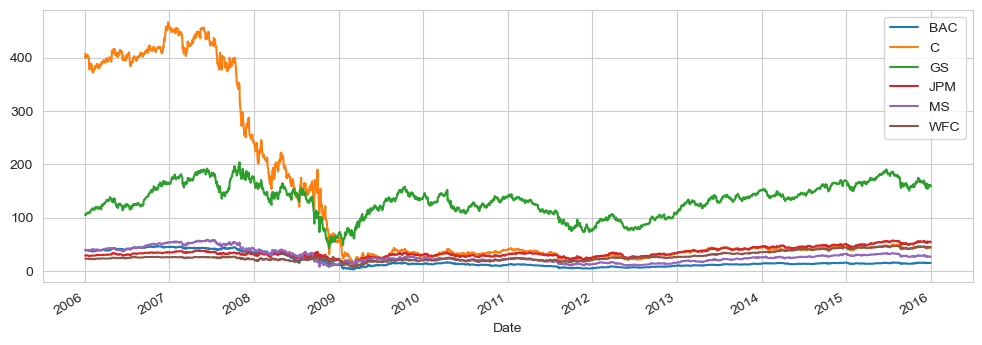

In [75]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
    plt.legend()
    
# the Citi bank orange line dips, due to large std deviation

<Axes: xlabel='Date'>

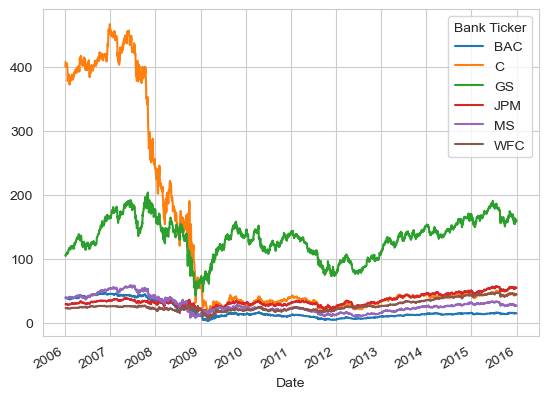

In [77]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()
# same graph but uses cross section instead of a for loop

In [78]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages
Plot the rolling 30 day average against the Close Price for Bank of America's stock for the year 2008

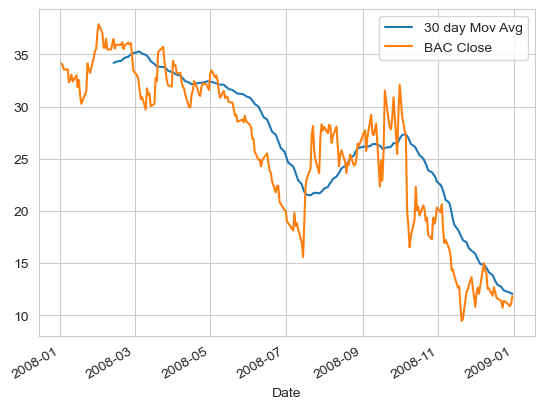

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [84]:
# Ensure the DataFrame's index is a DatetimeIndex and is sorted
BAC = BAC.sort_index()

# Plot the 30-day moving average and the closing prices for the given date range
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()
plt.show()
plt.figure(figsize=(12,4))

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

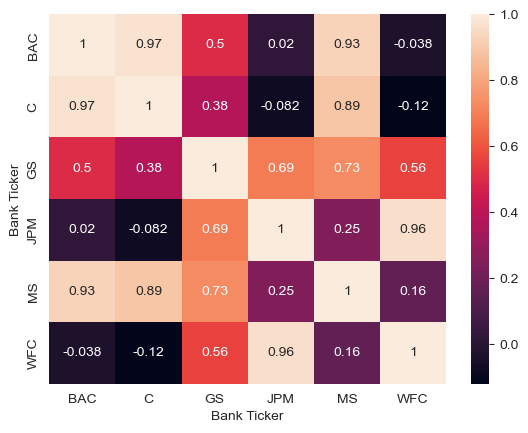

In [90]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

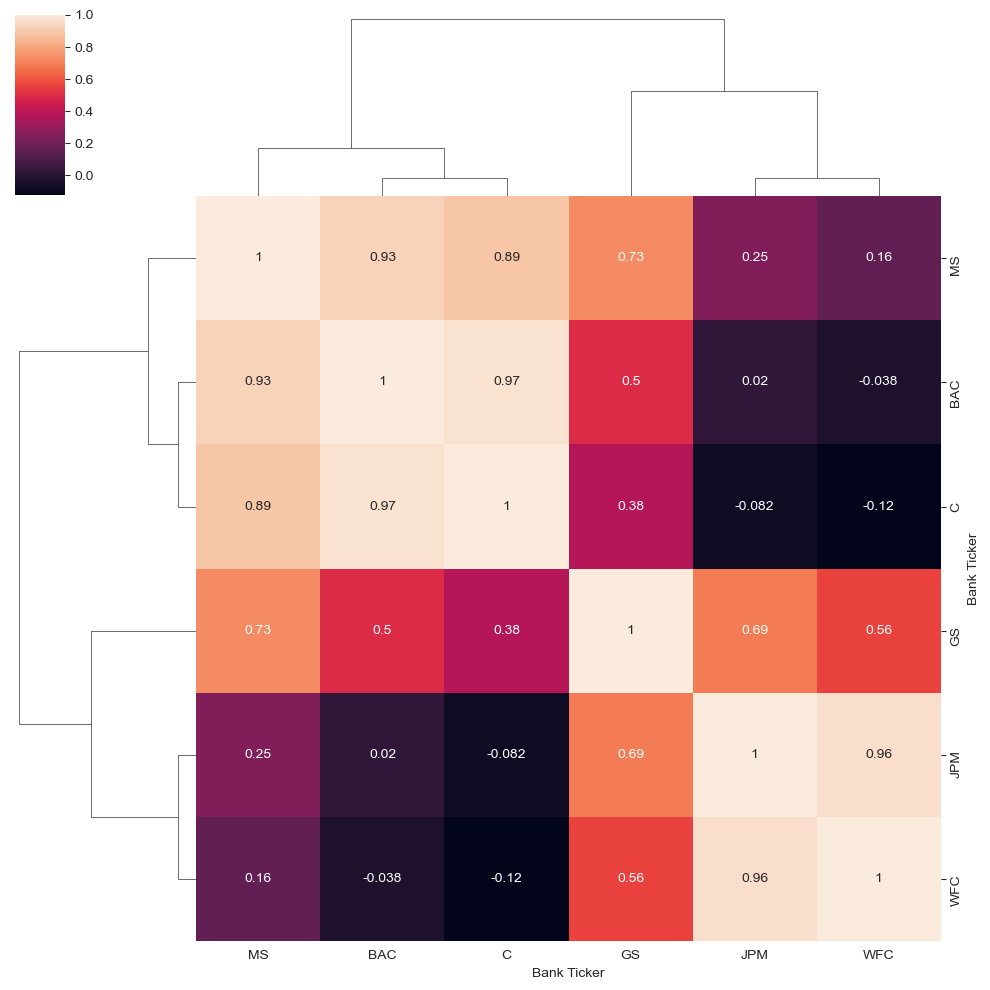

In [91]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)